<a href="https://colab.research.google.com/github/ziedjouini/new_projet/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB PRACTICE 9

https://www.youtube.com/watch?v=yrVVN29oCPI

Learning Outcomes
The goal of this lab session is to learn the Python implementations of classification and regression trees using
1. Bagging
2. Random Forest
3. Boosting

## 1. Bagging Classification Tree: Titanic dataset.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

In [ ]:
#read the file
df = pd.read_csv('Titanic.csv')



In [ ]:
#check for missing values
df.isnull().values.any()


False

In [ ]:
df

,No.,Survived,Pclass,Sex,Age,SibSp,PrCh,Fare
0,1,0,3,male,22.0,1,0,7.25
1,2,1,1,female,38.0,1,0,71.28
2,3,1,3,female,26.0,0,0,7.93
3,4,1,1,female,35.0,1,0,53.10
4,5,0,3,male,35.0,0,0,8.05
...,...,...,...,...,...,...,...,...
709,710,0,3,female,39.0,0,5,29.13
710,711,0,2,male,27.0,0,0,13.00
711,712,1,1,female,19.0,0,0,30.00
712,713,1,1,male,26.0,0,0,30.00


In [ ]:
df["mSex"]=np.where(df["Sex"]=="male",0,1)


In [ ]:
df

,No.,Survived,Pclass,Sex,Age,SibSp,PrCh,Fare,mSex
0,1,0,3,male,22.0,1,0,7.25,0
1,2,1,1,female,38.0,1,0,71.28,1
2,3,1,3,female,26.0,0,0,7.93,1
3,4,1,1,female,35.0,1,0,53.10,1
4,5,0,3,male,35.0,0,0,8.05,0
...,...,...,...,...,...,...,...,...,...
709,710,0,3,female,39.0,0,5,29.13,1
710,711,0,2,male,27.0,0,0,13.00,0
711,712,1,1,female,19.0,0,0,30.00,1
712,713,1,1,male,26.0,0,0,30.00,0


In [ ]:
#define the predictor and target variables
x = df[['Pclass', 'mSex', 'Age', 'SibSp', 'PrCh', 'Fare']]
y = df['Survived']

In [ ]:
# Split dataset into training set and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5, random_state=0)

In [ ]:
#scaling
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


In [ ]:
xtrain

array([[ 9.58829932e-01, -7.38548946e-01, -2.73220238e-01,
         5.80768270e-01, -5.07054827e-01, -3.74336888e-01],
       [ 9.58829932e-01,  1.35400640e+00,  2.87297832e-04,
        -5.46048427e-01, -5.07054827e-01, -4.07975222e-01],
       [-1.44329137e+00, -7.38548946e-01,  4.10548602e-01,
        -5.46048427e-01, -5.07054827e-01, -1.70457851e-01],
       ...,
       [-1.44329137e+00, -7.38548946e-01,  1.09431744e+00,
        -5.46048427e-01, -5.07054827e-01,  7.31288542e-01],
       [ 9.58829932e-01, -7.38548946e-01, -2.73220238e-01,
         5.80768270e-01, -5.07054827e-01, -4.87033843e-01],
       [-1.44329137e+00,  1.35400640e+00,  1.02594056e+00,
         5.80768270e-01,  7.50018598e-01,  2.19412917e+00]])

In [ ]:
#Normalization: 0 and 1. min:0 and max= 1
#MinMaxScaler()
#sklearn.preprocessing import MinMaxScaler
#Xi= Xi-Xmin/Xmax-Xmin

In [ ]:
#Build the bagging model
dtc = DecisionTreeClassifier()
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
bag_model=bag_model.fit(xtrain,ytrain)
ytest_pred=bag_model.predict(xtest)
print(bag_model.score(xtest, ytest))

0.7591036414565826


In [ ]:
BaggingClassifier(dtc, n_estimators= 10 (or 20, 30, 40, 50))

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.


In [ ]:
# Plot Validation Curve
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

In [ ]:
# Create range of values for parameter (up to 250 trees, with stepsize 5)
param_range = np.arange(1, 250, 5)


In [ ]:
param_range

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246])

In [ ]:
# Calculate accuracy on training and test set using range of parameter values
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
train_scores, test_scores = validation_curve(BaggingClassifier(),xtrain, ytrain, param_name="n_estimators",
                                             param_range=[  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246] , cv=5, scoring="accuracy", n_jobs=-1)


In [ ]:
# 50 trainscores and 50 testscores
#transcore1, testscore1


#transcore50, testscore50


In [ ]:
train_scores

array([[0.90877193, 0.92631579, 0.92657343, 0.91258741, 0.91958042],
       [0.94035088, 0.97894737, 0.95454545, 0.95454545, 0.97202797],
       [0.98245614, 0.97894737, 0.98251748, 0.97902098, 0.97202797],
       [0.98245614, 0.98245614, 0.98251748, 0.97902098, 0.98251748],
       [0.98596491, 0.98947368, 0.98601399, 0.97902098, 0.98951049],
       [0.99298246, 0.98947368, 0.98951049, 0.99300699, 0.97902098],
       [0.98245614, 0.98947368, 0.98601399, 0.98951049, 0.98951049],
       [0.98245614, 0.98596491, 0.98951049, 0.98601399, 0.98951049],
       [0.98947368, 0.98947368, 0.99300699, 0.98951049, 0.98251748],
       [0.99298246, 0.98947368, 0.98601399, 0.99300699, 0.98951049],
       [0.99298246, 0.98947368, 0.99300699, 0.99300699, 0.98951049],
       [0.99298246, 0.98947368, 0.99300699, 0.99300699, 0.98951049],
       [0.98947368, 0.98947368, 0.99300699, 0.98951049, 0.98951049],
       [0.99298246, 0.98947368, 0.99300699, 0.99300699, 0.98951049],
       [0.99298246, 0.98947368, 0.

In [ ]:
train_scores.shape

(50, 5)

In [ ]:
#bag_model1=BaggingClassifier(base_estimator=dtc, n_estimators=1, bootstrap=True)
#bag_model2=BaggingClassifier(base_estimator=dtc, n_estimators=6, bootstrap=True)
#.....
#bag_model50=BaggingClassifier(base_estimator=dtc, n_estimators=246, bootstrap=True)

In [ ]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


In [ ]:
train_mean

array([0.9187658 , 0.96008343, 0.97899399, 0.98179364, 0.98599681,
       0.98879892, 0.98739296, 0.9866912 , 0.98879647, 0.99019752,
       0.99159612, 0.99159612, 0.99019507, 0.99159612, 0.99089682,
       0.99159612, 0.99159612, 0.99159612, 0.99159612, 0.99159612,
       0.99089437, 0.99159612, 0.99089682, 0.99159612, 0.99159612,
       0.99159612, 0.99159612, 0.99159612, 0.99159612, 0.99159612,
       0.99159612, 0.99159612, 0.99159612, 0.99159612, 0.99159612,
       0.99159612, 0.99159612, 0.99159612, 0.99159612, 0.99159612,
       0.99159612, 0.99159612, 0.99159612, 0.99159612, 0.99159612,
       0.99159612, 0.99159612, 0.99159612, 0.99159612, 0.99159612])

In [ ]:
train_mean.max()

In [ ]:
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


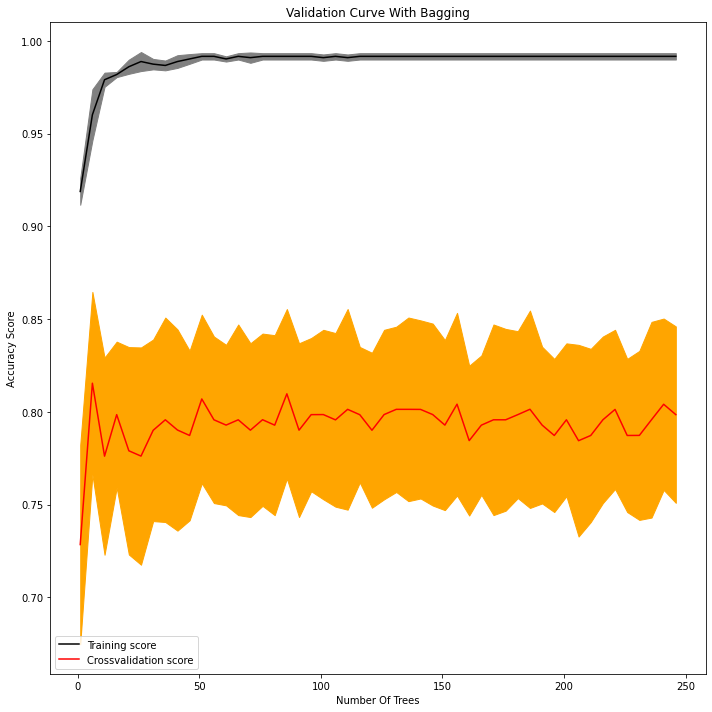

In [ ]:
# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10,10))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Crossvalidation score", color="red")
# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std,color="orange")
# Create plot
plt.title("Validation Curve With Bagging")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
BaggingClassifier(dtc, n_estimators=60)

## 2. Random Forest Regression Tree: Hitters dataset

In [ ]:
#read the file
df = pd.read_csv('Hitters.csv')

In [ ]:
#check for missing values

print(df.isnull().values.sum())
df.isnull().values.any()

59


True

In [ ]:
#Drop the rows where at least one element is missing.
ddf=df.dropna()

In [ ]:
ddf

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [ ]:
#Selected attribute and target variables
x = ddf[['Hits', 'Years']]
y = ddf['Salary']


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5,
                                                random_state=0)

In [ ]:
#scaling
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

RMSE: 385.04449413262523


## 3. Boosting Classification Tree: Titanic dataset


In [ ]:
#read the file
df = pd.read_csv('Titanic.csv')

In [ ]:
#check for missing values
df.isnull().values.any()

False

In [ ]:

df["mSex"]=np.where(df["Sex"]=="male",0,1)

In [ ]:
#define the predictor and target variables
x = df[['Pclass', 'mSex', 'Age', 'SibSp', 'PrCh', 'Fare']]
y = df['Survived']

In [ ]:
# Split dataset into training set and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5,
                                                random_state=0)

In [ ]:
#scaling
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
clf = GradientBoostingClassifier(random_state=0)
clf.fit(xtrain, ytrain)
clf.predict(xtest)
clf.score(xtest, ytest)

0.8095238095238095

In [ ]:
#Grad

## 4. Boosting Regression Tree: advertisement dataset.

Implement Boosting regression tree on the advertisement dataset.